## Computing and plotting wind speed forecast (GRIB)

In this notebook we will demonstrate how to:
* extract wind componets on the 500 hPa pressure level
* compute the wind speed
* change the GRIB header in the resulting fields
* plot the results

In [1]:
import metview as mv

First, we **retrieve** the wind forecast data from **MARS** for a set of pressure levels and forecast steps on a 5x5 degree **regular latlon grid**. Alternatively we can read these fields from disk.

In [12]:
use_mars = False # if False, then read data from disk

In [13]:
if use_mars: 
    g = mv.retrieve(type='fc', 
                date = -1, 
                time = 12,
                param = ['u','v'], 
                levelist = ['500', '1000'], 
                levType = 'pl',
                step = [0, 6, 12, 18],            
                grid = [5, 5])
else:
    g = mv.read('data_uv.grib')

The result is a [Fieldset](https://confluence.ecmwf.int/display/METV/Fieldset+Functions), which is Metview's own class to represent GRIB data. We can check the contens of our fieldset with the **grib_get()** function that can extract a set of metadata keys from the GRIB header.

In [4]:
mv.grib_get(g, ['shortName', 'level', 'step'])    

[['u', '500', '0'],
 ['v', '500', '0'],
 ['u', '1000', '0'],
 ['v', '1000', '0'],
 ['u', '500', '6'],
 ['v', '500', '6'],
 ['u', '1000', '6'],
 ['v', '1000', '6'],
 ['u', '500', '12'],
 ['v', '500', '12'],
 ['u', '1000', '12'],
 ['v', '1000', '12'],
 ['u', '500', '18'],
 ['v', '500', '18'],
 ['u', '1000', '18'],
 ['v', '1000', '18']]

Next, we **filter** out the 500 hPa wind components using **read()**.

In [5]:
u = mv.read(data=g, param='u', levelist='500')
v = mv.read(data=g, param='v', levelist='500')

Having extracted the wind components we **compute** the wind speed fields using Metview's high level field artihmetic. 

In [6]:
sp = mv.sqrt(u*u + v*v)

We can see that in the results the **paramId** and the corresponding **shortName** still refer to the u wind component.

In [7]:
mv.grib_get(sp, ['shortName', 'paramId','level', 'step'])

[['u', '131', '500', '0'],
 ['u', '131', '500', '6'],
 ['u', '131', '500', '12'],
 ['u', '131', '500', '18']]

The reason for it is that Metview always copies the metadata of the first field in the expression into the resulting field. When plotting fields the automatic contouring and title are based on the **paramId**. So it is generally a good idea to set it correctly, and we will do it by using the **grib_set_long()** function (changing the paramId will set the shortName automatically).

In [8]:
sp = mv.grib_set_long(sp, ['paramId', 10])
mv.grib_get(sp, ['shortName', 'paramId','level', 'step'])

[['ws', '10', '500', '0'],
 ['ws', '10', '500', '6'],
 ['ws', '10', '500', '12'],
 ['ws', '10', '500', '18']]

Finally, we **plot** the first windspeed field using automatic contouring and title settings.

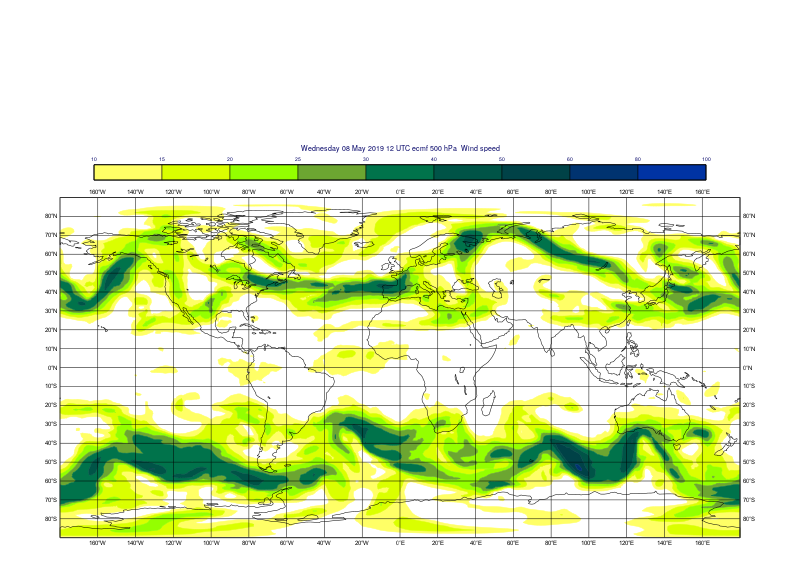

In [9]:
mv.setoutput('jupyter')
mv.plot(sp, mv.mcont(contour_automatic_setting='ecmwf', legend='on'))

# Additional resources

- [Introductory Metview training course](https://confluence.ecmwf.int/display/METV/Data+analysis+and+visualisation+using+Metview)
- [Metview's Python interface](https://confluence.ecmwf.int/display/METV/Metview%27s+Python+Interface)
- [Function list](https://confluence.ecmwf.int/display/METV/List+of+Operators+and+Functions)